# Example: REV analysis for PD

This example demonstrates how to perform REV analysis for persistence diagrams (PD), generated by PD-generator.

PD is a set of "birth"-"death" persistence pairs located at $XY$ coordinate plane. (TO DO: describe PD more here).

Using our library, one can perform REV analysis for PD$_0$, PD$_1$ and PD$_2$ - persistence diagrams of rank 0, 1 and 3, respectively. Four different vectorization methods, mapping 2D PD structure into 1D vector, are available: simple binnig, persistence image, landscape and silhouette.

Here, we present REV analysis of PD with PD$_0$ and PD$_1$ metrics and simple binnig vectorization method.

In [1]:
from revanalyzer import REVAnalyzer
from revanalyzer.metrics import PD0, PD1
from revanalyzer.vectorizers import SimpleBinningVectorizer

In [2]:
#inizialization

image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = (300, 300, 300) #size of image in x, y and z directions
n_steps = 6 # number of subsamples selection steps
sREV_max_step = 4 #maximal step for which sREV analysis is performed.
datadir = 'data' # path to folder containing image, default: 'data'
outputdir = 'output' # path to outputfolder containig image, default: 'output'

bins = 20 #number of bins at each axe in XY plane.
skip_zeros = True # If True, bins of 2D histogram empty for both compared PDs are not included into the final vectors;
                  #default: True.
vectorizer = SimpleBinningVectorizer(bins) #vectorizer inizialization

exe_path = '/home/azubov/pd_generator/pore-network-extraction/build_release/bin/persistence_pairs' #path to 
            #PD generator 

n_threads = 32 #number of CPU cores used by PD generator, default: 1

show_time = True #default: False. Added to monitor time cost for large images.

metric = PD0(vectorizer = vectorizer, exe_path = exe_path, n_threads = n_threads, show_time = show_time)

analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)

In [3]:
#generate metric data for all the subsamples:
analyzer.generate()

cut  cut1_0 , run time: 
--- 0.26871371269226074 seconds ---
cut  cut1_1 , run time: 
--- 0.21923828125 seconds ---
cut  cut1_2 , run time: 
--- 0.24274206161499023 seconds ---
cut  cut1_3 , run time: 
--- 0.2251589298248291 seconds ---
cut  cut1_4 , run time: 
--- 0.22793149948120117 seconds ---
cut  cut1_5 , run time: 
--- 0.24634289741516113 seconds ---
cut  cut1_6 , run time: 
--- 0.2154223918914795 seconds ---
cut  cut1_7 , run time: 
--- 0.23679304122924805 seconds ---
cut  cut1_8 , run time: 
--- 0.2234196662902832 seconds ---
cut  cut2_0 , run time: 
--- 1.6340234279632568 seconds ---
cut  cut2_1 , run time: 
--- 1.594170093536377 seconds ---
cut  cut2_2 , run time: 
--- 1.6518118381500244 seconds ---
cut  cut2_3 , run time: 
--- 1.636045217514038 seconds ---
cut  cut2_4 , run time: 
--- 1.5805437564849854 seconds ---
cut  cut2_5 , run time: 
--- 1.654738426208496 seconds ---
cut  cut2_6 , run time: 
--- 1.7103734016418457 seconds ---
cut  cut2_7 , run time: 
--- 1.725445747375

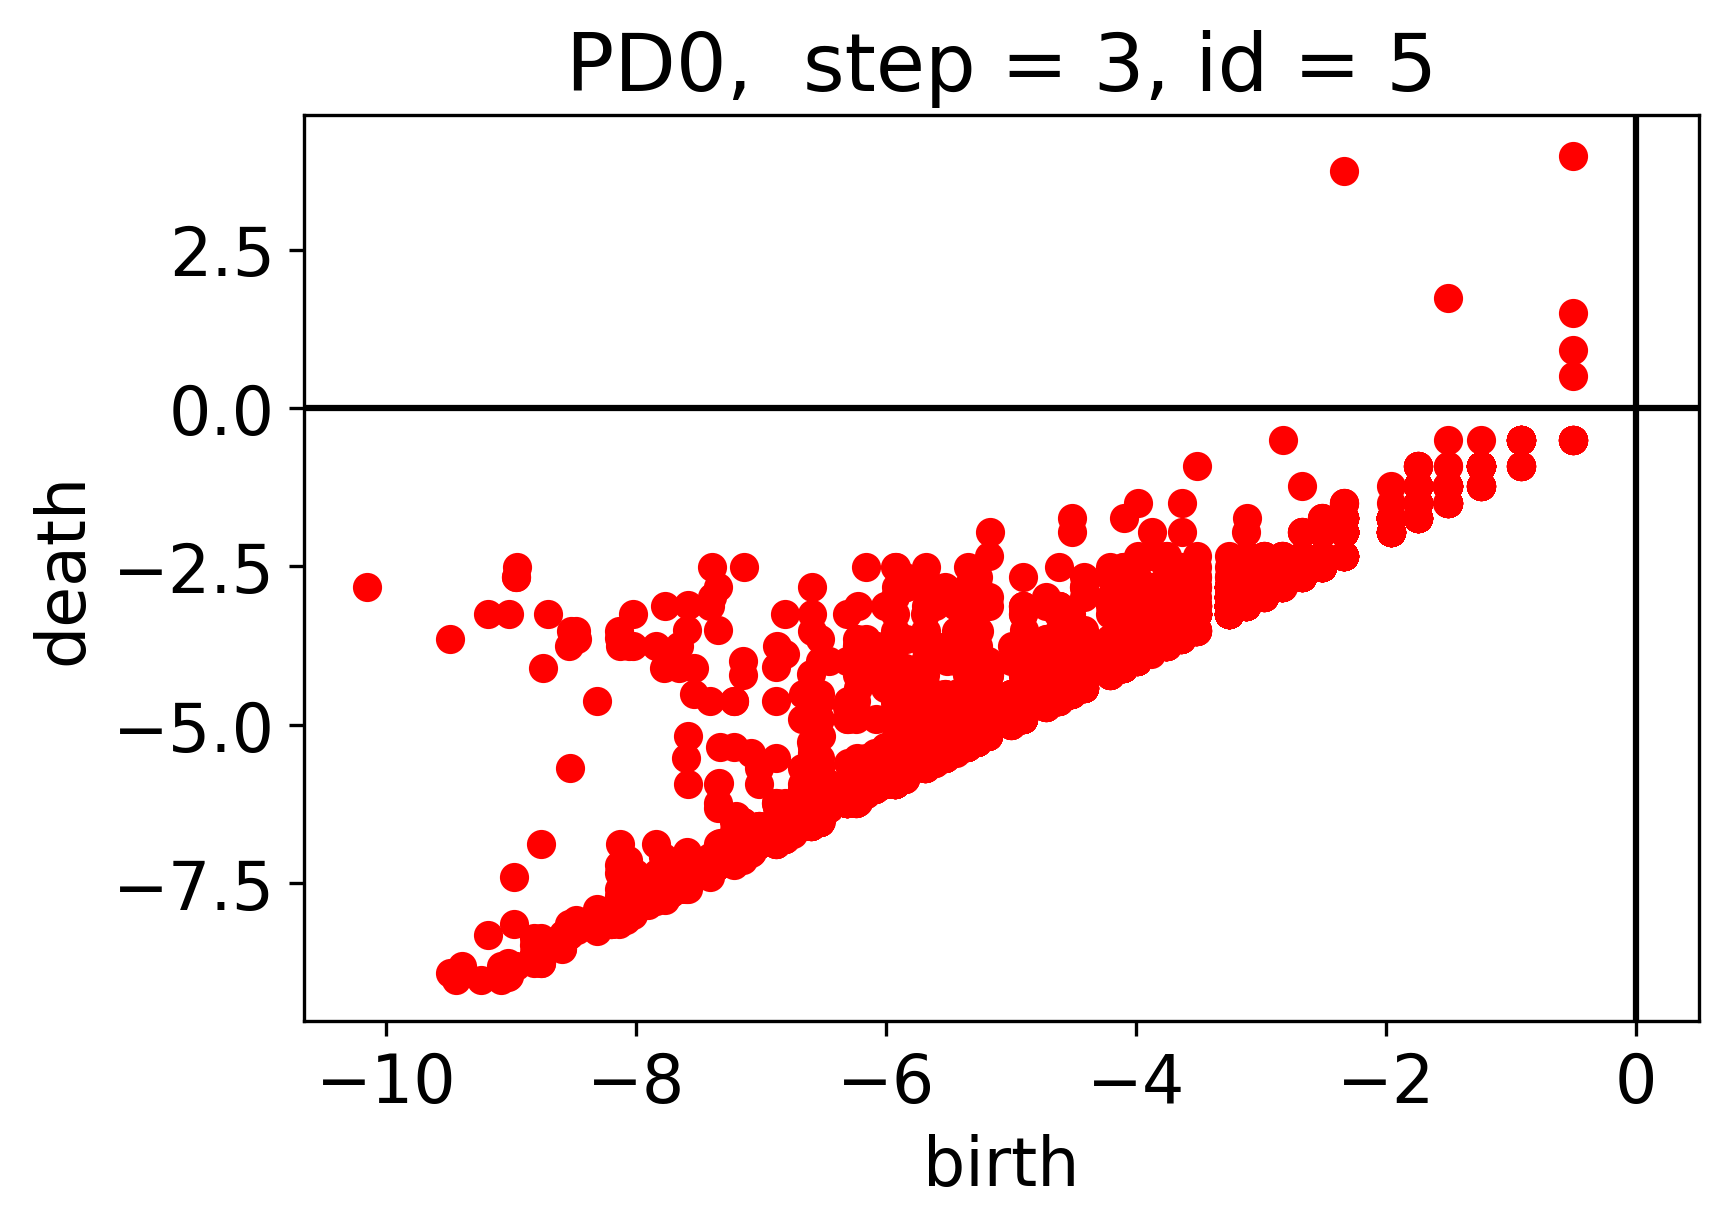

In [4]:
#Visualize PD for a given subcube:
analyzer.show(step = 3, cut_id = 5)

In [5]:
#vectorization
analyzer.vectorize()

In [6]:
#fix thresholds and analyze vectorized data
analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)

In [7]:
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)

{1: 0.4335881894738049, 2: 0.16515155530322256, 3: 0.08963866365099481, 4: 0.042565255980750526, 5: 0.019457986556533538}
{1: 0.11989468765794196, 2: 0.05834312099506982, 3: 0.03855647404170247, 4: 0.009156894993867527}
{1: 0.5994734382897098, 2: 0.2917156049753491, 3: 0.19278237020851233, 4: 0.04578447496933763}
{1: 0.2765174203740284, 2: 0.2917156049753491, 3: 0.19278237020851233, 4: 0.04578447496933763}


In [8]:
#get dREV and sREV size estimation
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

100
150
150


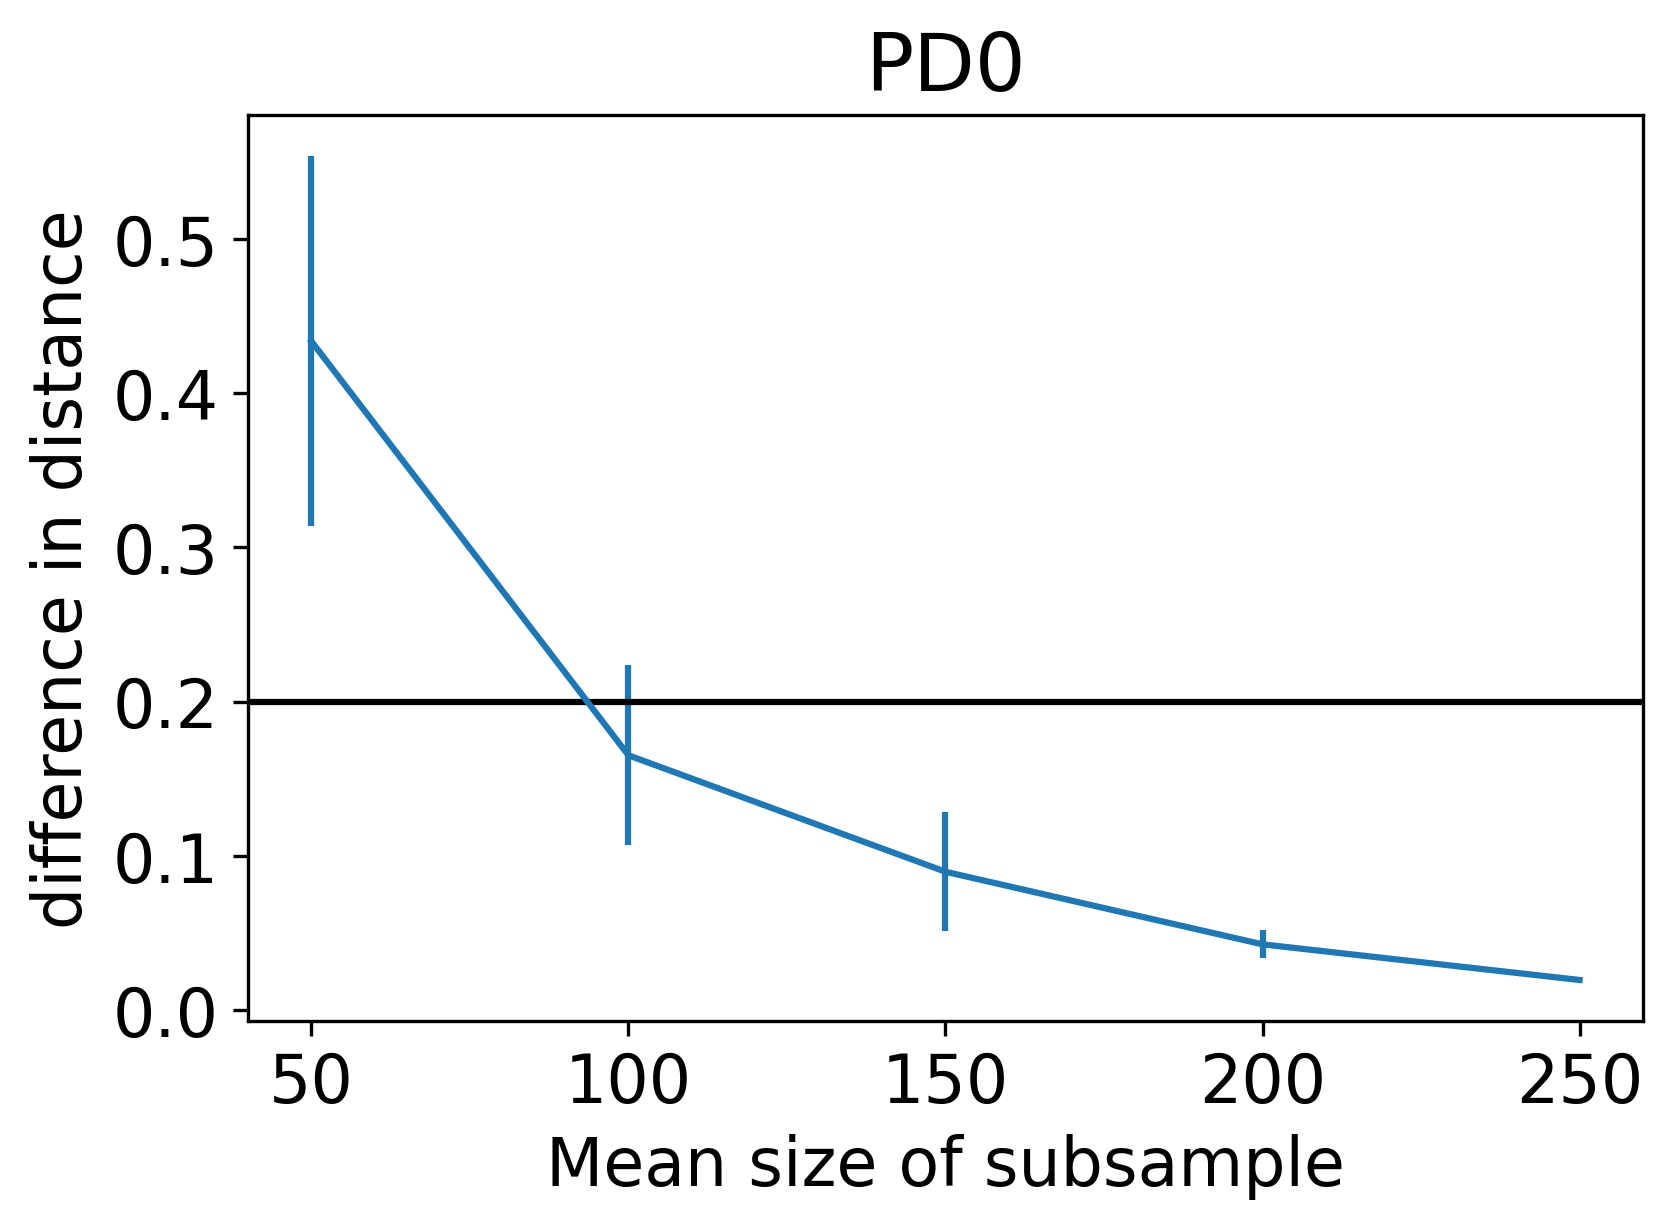

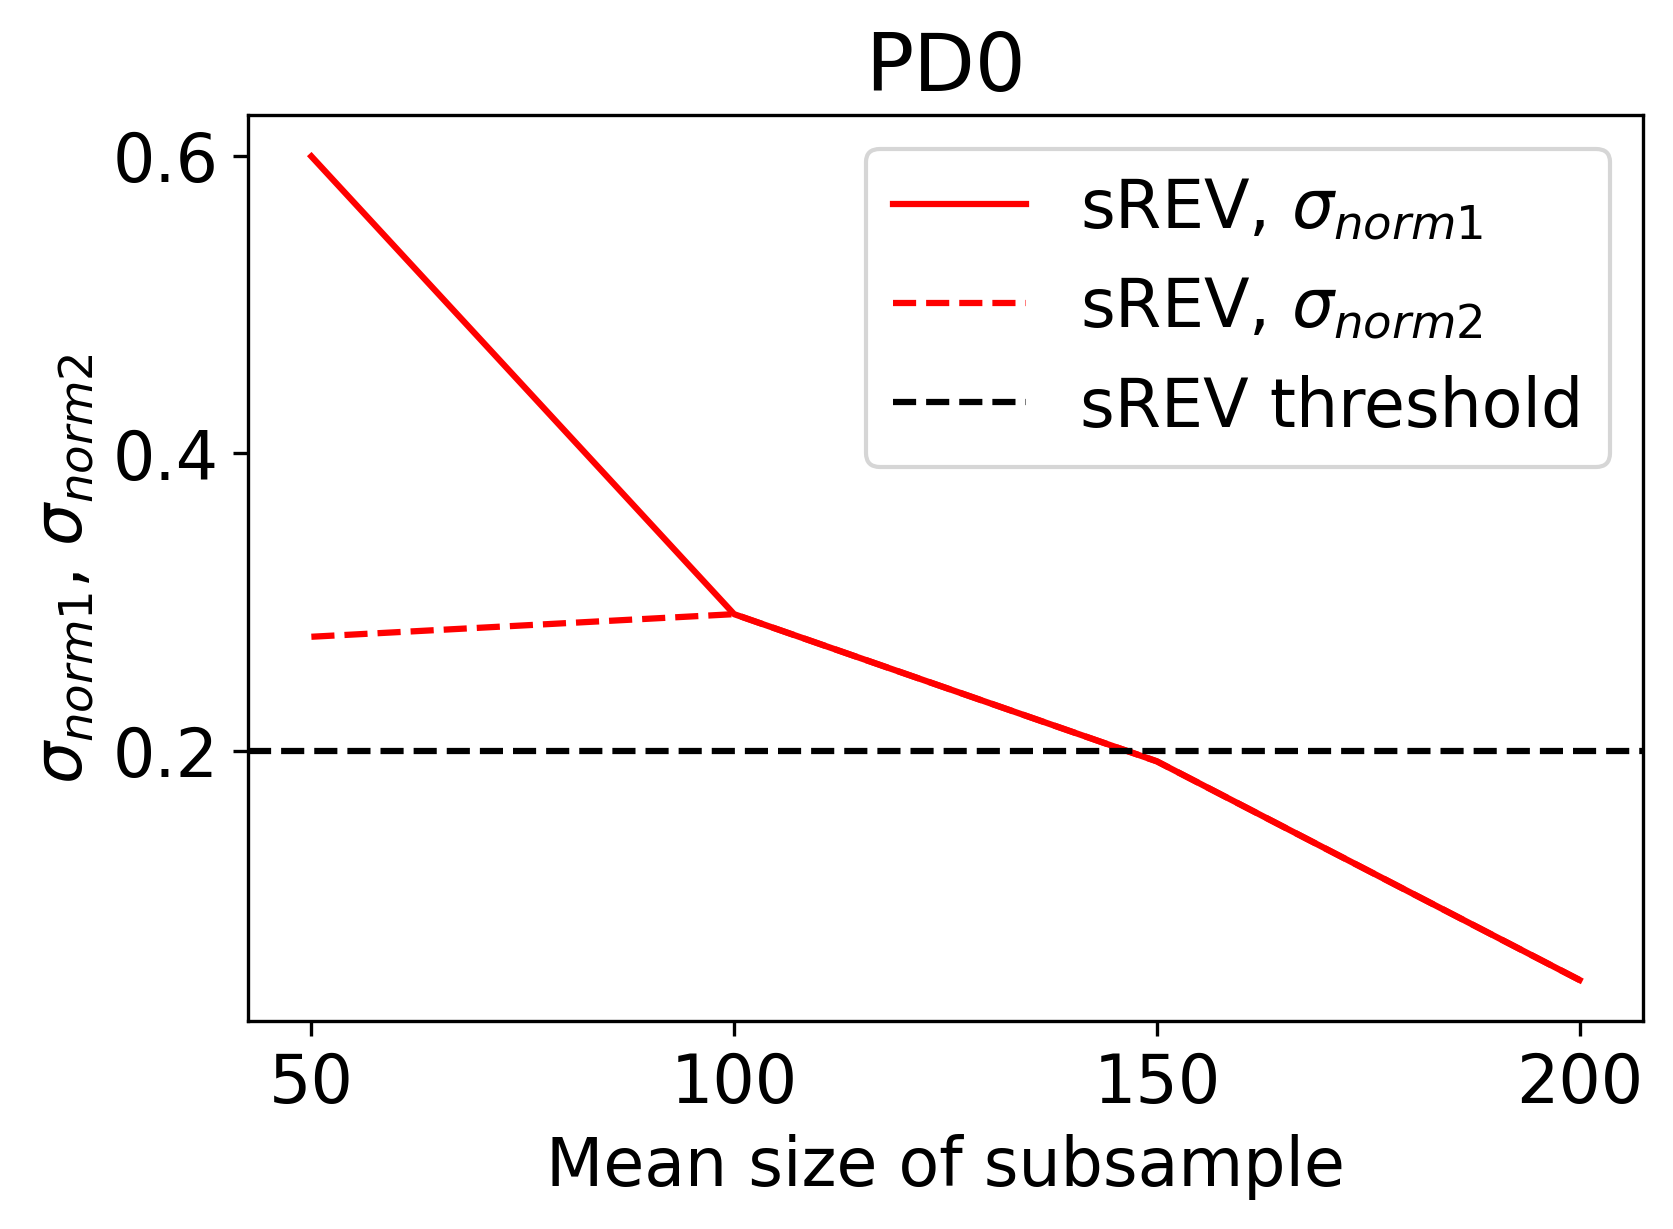

In [9]:
analyzer.show_results()

In [10]:
#Note PD generator generates both PD0, PD1 and PD2 data, whenever one of this metrics is chosen. 
#So calling the method generate() can be skiped, if one wants now to consider PD1 metric.

metric = PD1(vectorizer = vectorizer, exe_path = exe_path, n_threads = n_threads, show_time = show_time)

analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)

analyzer.vectorize()

analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)

In [11]:
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

{1: 0.45017536981009015, 2: 0.16167001819034846, 3: 0.07896554038217818, 4: 0.045172320169702476, 5: 0.03819769703245246}
{1: 0.1067021510623342, 2: 0.04456238361881455, 3: 0.03239793476724491, 4: 0.012201965765243733}
{1: 0.533510755311671, 2: 0.22281191809407275, 3: 0.16198967383622453, 4: 0.061009828826218665}
{1: 0.23702352065006868, 2: 0.22281191809407275, 3: 0.16198967383622453, 4: 0.061009828826218665}
100
150
150


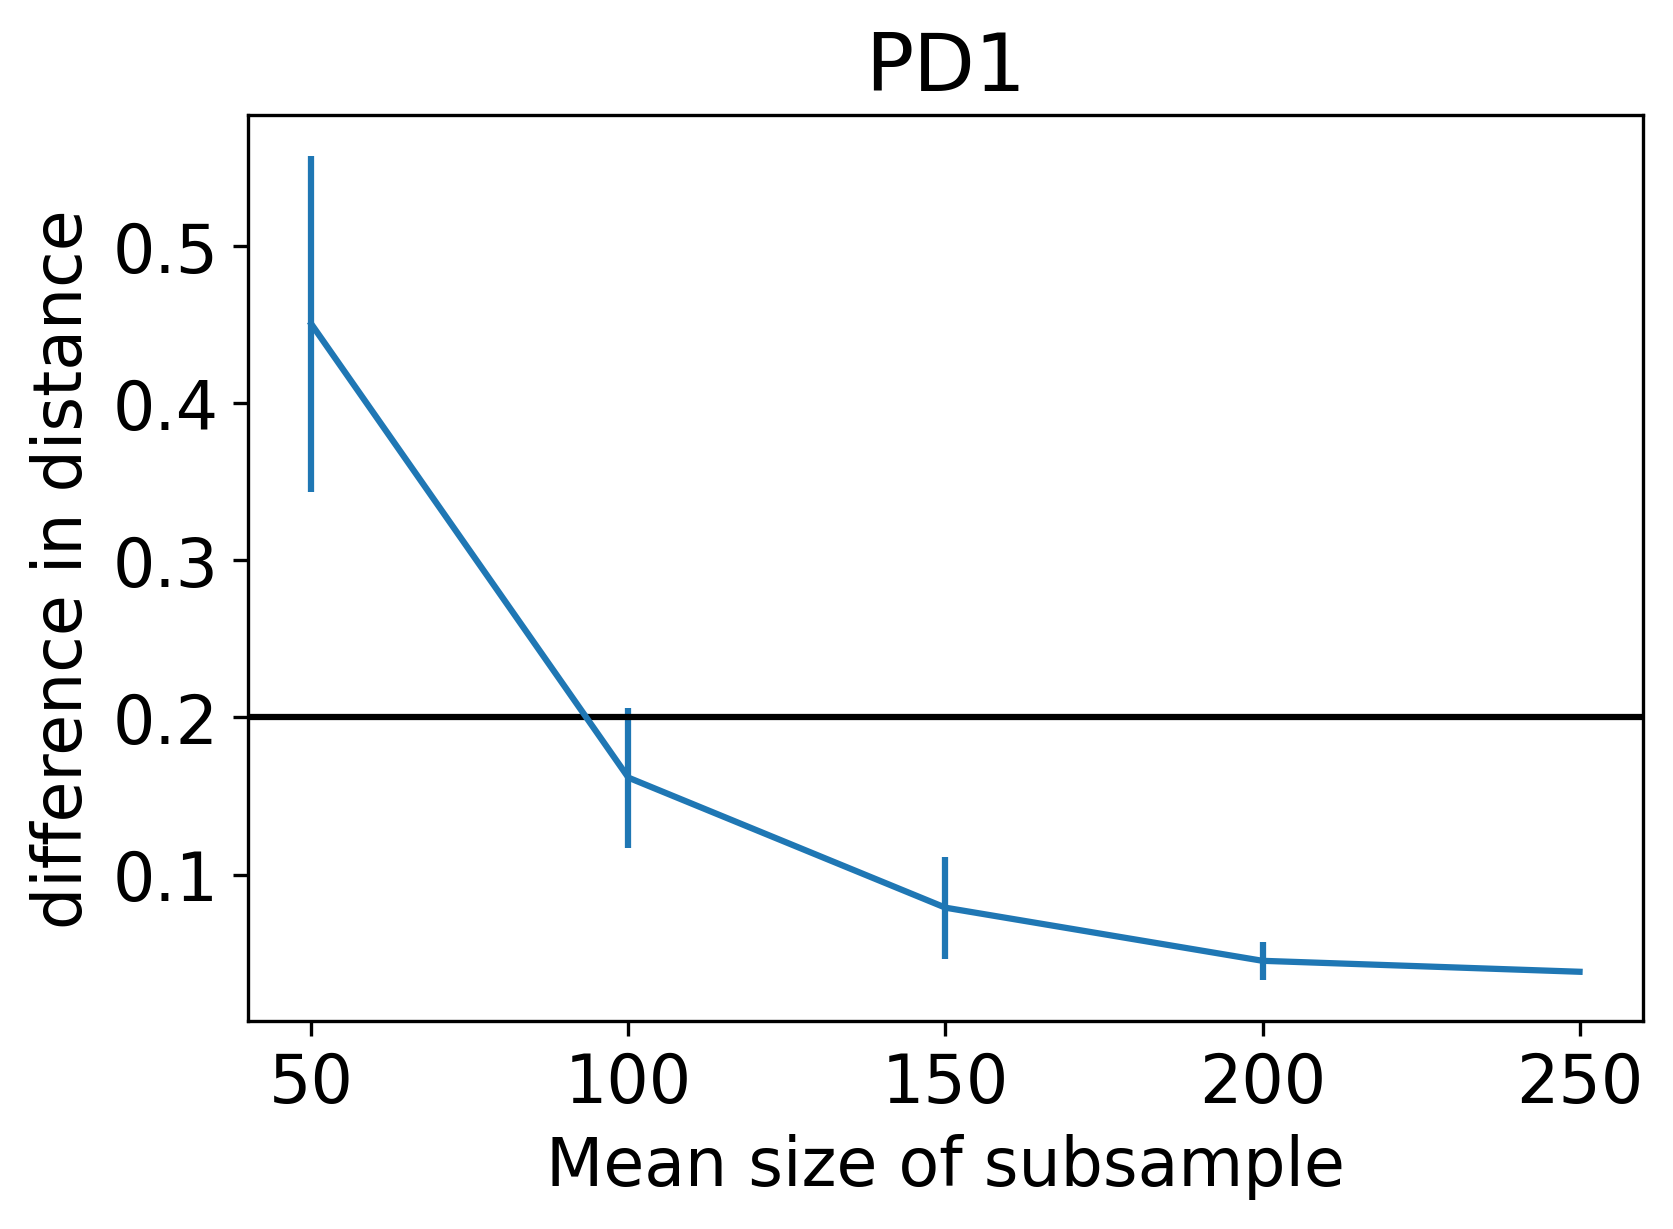

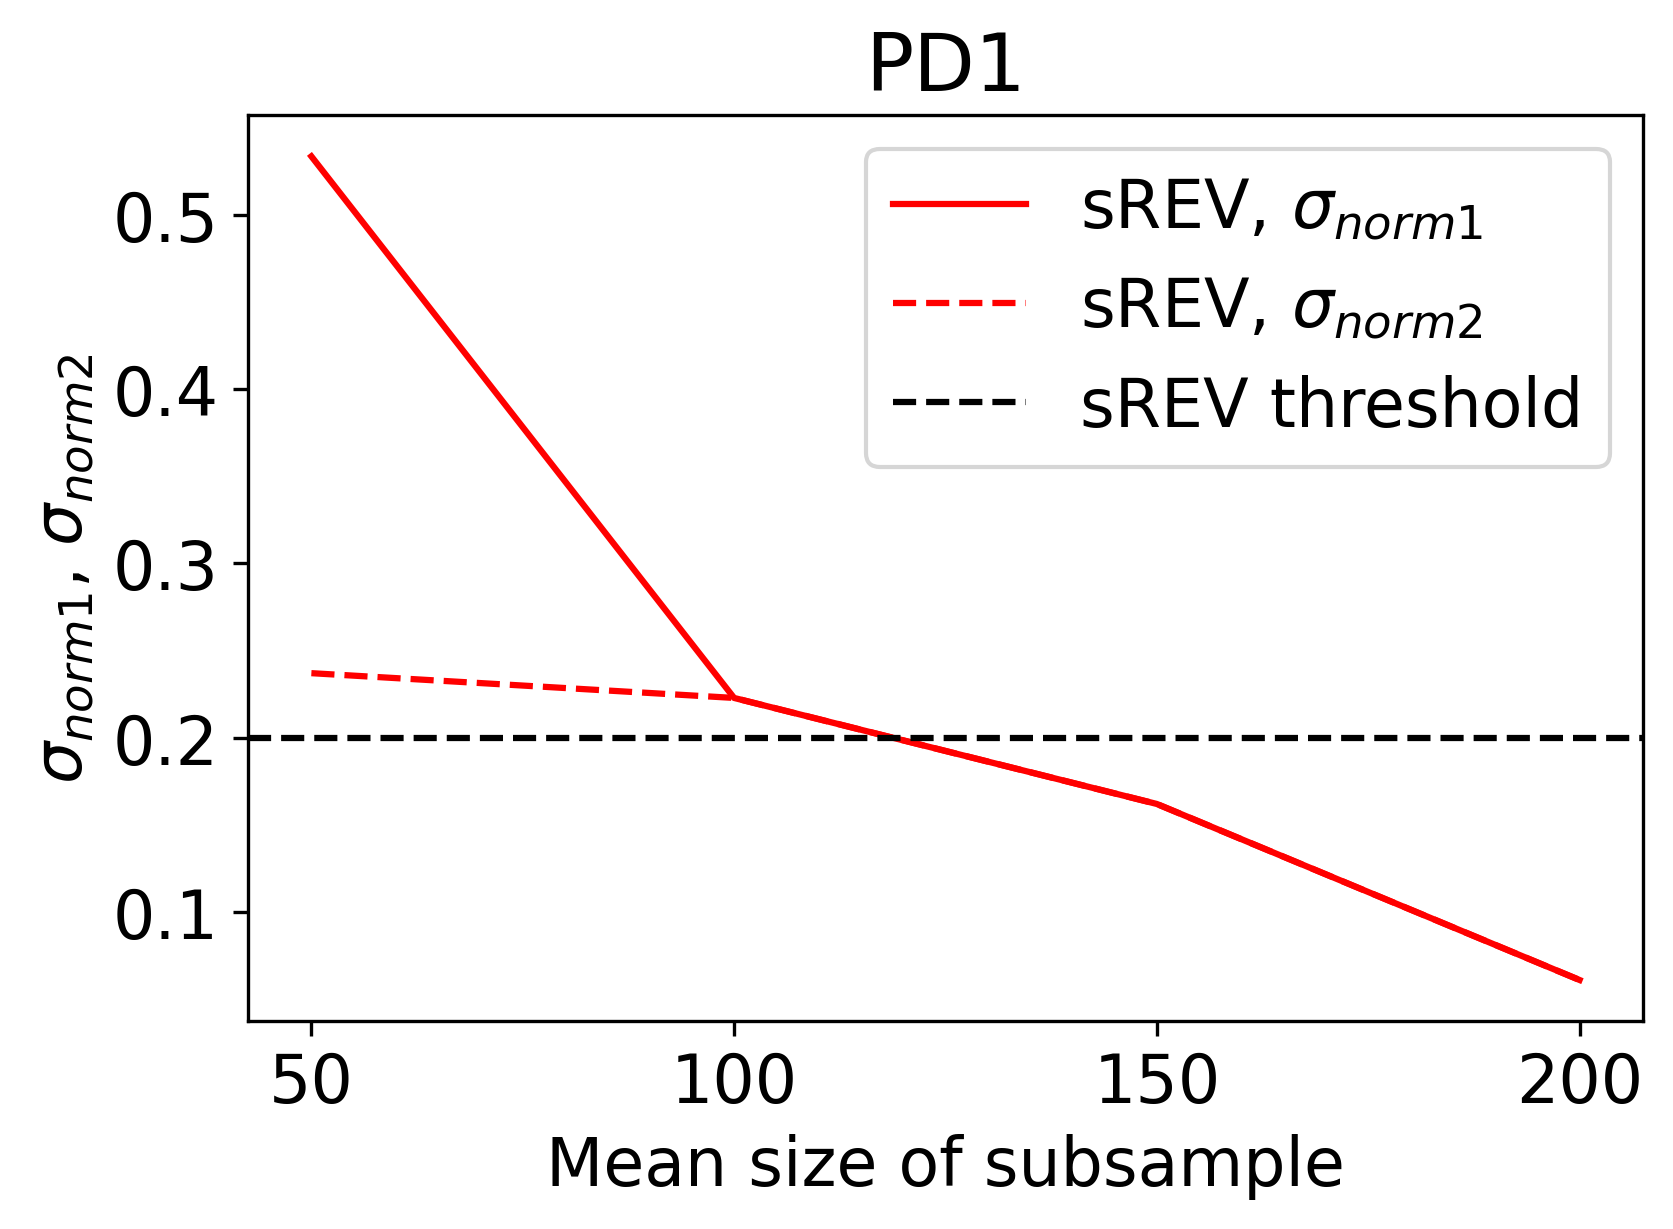

In [12]:
analyzer.show_results()